<a href="https://colab.research.google.com/github/warriors8970/hotel-booking/blob/main/internship_hotelbooking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#!unzip '/content/drive/MyDrive/Internship_solar/Hotel_booking/hotel_booking.zip' -d '/content/drive/MyDrive/Internship_solar/Hotel_booking/'

# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the file and visualizing

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Internship_solar/Hotel_booking/Project 1/Data/hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
data.shape

(119390, 32)

# Check if NaN is there
- replace with 0
- remove data which doesnt make sense

In [ ]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
data.fillna(0, inplace = True)
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
list_cols = ["children", "adults", "babies"]

for i in list_cols:
  print(f"{i} has unique values as {data[i].unique()}")

children has unique values as [ 0.  1.  2. 10.  3.]
adults has unique values as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
babies has unique values as [ 0  1  2 10  9]


In [ ]:
filtered_data = (data["children"] == 0) & (data["adults"] == 0) & (data["babies"] == 0)

new_data = data[~filtered_data]
new_data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,0.0,0.0,0,Transient,107.0,0,0,Check-Out,7/3/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,0.0,0,Transient,103.0,0,1,Check-Out,7/3/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,0.0,0,Transient,82.0,0,1,Canceled,5/6/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,0.0,0,Transient,105.5,0,0,Canceled,4/22/2015


In [ ]:
new_data.shape

(119210, 32)

# Country wise data analysis

In [ ]:
country_wise = new_data[new_data['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise.columns = ["Country", "No. of guests"]
country_wise.head()

,Country,No. of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067


In [ ]:
import plotly.express as px

map_guests = px.choropleth(country_wise, locations = country_wise['Country'],
                           color = country_wise["No. of guests"],
                           title = "Home Country")

In [ ]:
map_guests.show()

# Cost analysis

In [ ]:
new_data["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
data_cost = new_data[new_data["is_canceled"] == 0]

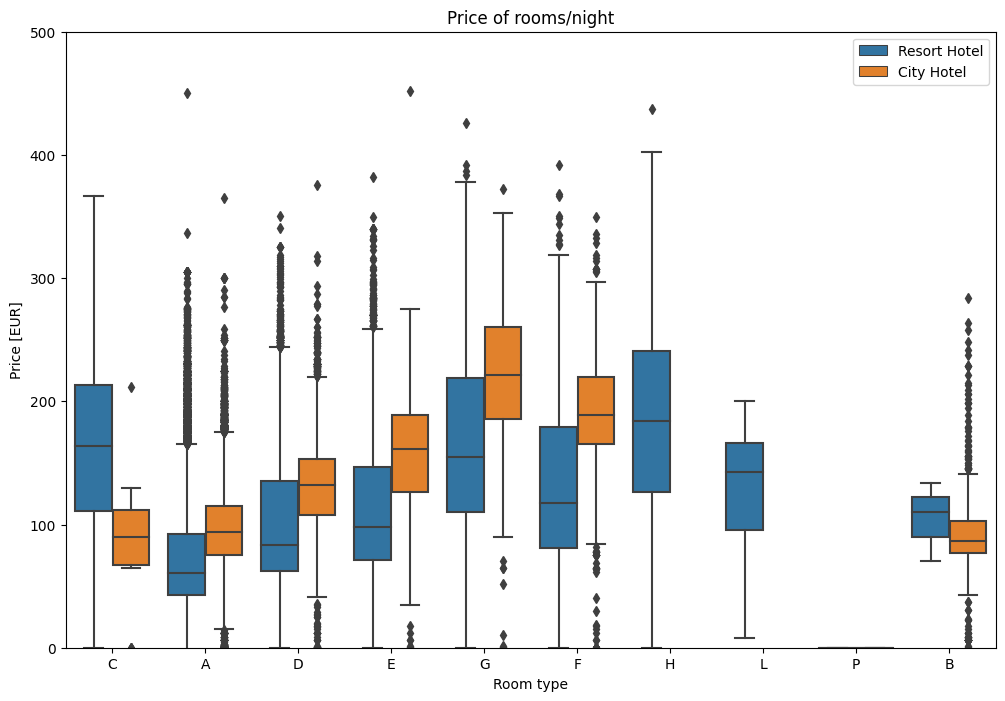

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'reserved_room_type',
            y = "adr",
            hue = "hotel", data=data)

plt.title("Price of rooms/night", fontsize = 12)
plt.xlabel("Room type")
plt.ylabel("Price [EUR]")
plt.legend(loc = 'upper right')
plt.ylim(0,500)
plt.show()

In [ ]:
data_resort = new_data[(new_data["hotel"] == "Resort Hotel") & (new_data["is_canceled"] == 0)]
data_city = new_data[(new_data["hotel"] == "City Hotel")& (new_data["is_canceled"] == 0)]

In [ ]:
resort_hotel = data_resort.groupby(["arrival_date_month"])['adr'].mean().reset_index()
city_hotel = data_city.groupby(["arrival_date_month"])['adr'].mean().reset_index()

In [ ]:
hotels = resort_hotel.merge(city_hotel, on="arrival_date_month")
hotels.columns = ['Month', 'Price for resort hotel', 'Price for city hotel']
hotels

,Month,Price for resort hotel,Price for city hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


In [ ]:
from calendar import month_name

def sort_month(df, colname):
  month_dict = {j:i for i,j in enumerate(month_name)}
  df["month_num"] = df[colname].apply(lambda x: month_dict[x])
  return df.sort_values(by = "month_num").reset_index().drop(['index', 'month_num'], axis=1)

In [ ]:
sort_month(hotels, "Month")

,Month,Price for resort hotel,Price for city hotel
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


<Axes: xlabel='Month'>

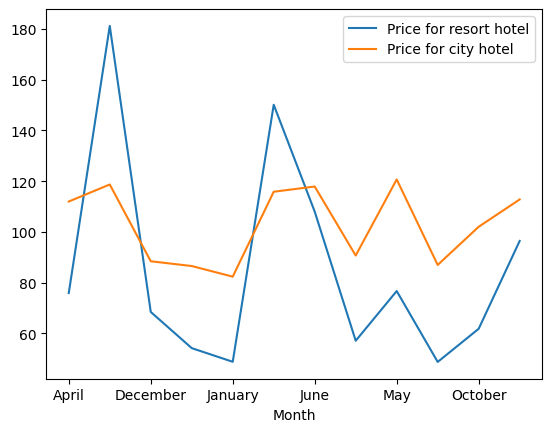

In [ ]:
hotels.plot(kind="line", x='Month', y=['Price for resort hotel','Price for city hotel'])

# When population is high?

In [ ]:
pop_resort = data_resort["arrival_date_month"].value_counts().reset_index()
pop_resort.columns=["Month", "No of guests"]
pop_resort

,Month,No of guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [ ]:
pop_city = data_city["arrival_date_month"].value_counts().reset_index()
pop_city.columns=["Month", "No of guests"]
pop_city

,Month,No of guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [ ]:
pop = pop_resort.merge(pop_city ,on="Month")
#sort_month(pop,"Month")
pop.columns=["months", "guests in resort hotel", "guests in city hotel"]


In [ ]:
final_pop = sort_month(pop,"months")
final_pop

,months,guests in resort hotel,guests in city hotel
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


<Axes: xlabel='months'>

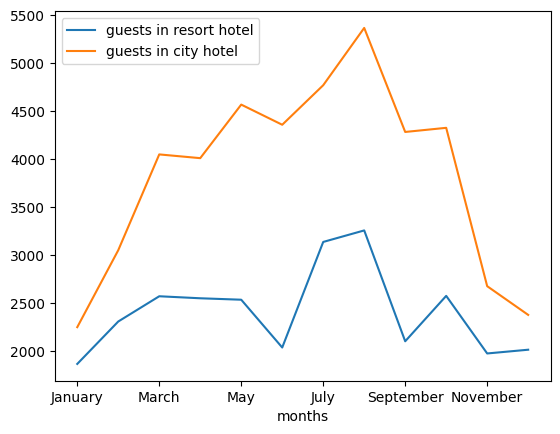

In [ ]:
final_pop.plot(kind="line", x="months",
               y = ['guests in resort hotel','guests in city hotel'])

# How long people stay at hotel?

In [ ]:
not_cancelled = new_data[new_data['is_canceled'] == 0]
not_cancelled.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
not_cancelled["total_nights"] = not_cancelled["stays_in_week_nights"]+ not_cancelled["stays_in_weekend_nights"]

<ipython-input-29-2d44c2c5a959>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
not_cancelled.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015,2


In [ ]:
stay = not_cancelled.groupby(['total_nights','hotel']).size().reset_index(name="No of stays")
stay = stay.iloc[:,0:3]
stay

,total_nights,hotel,No of stays
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


<Axes: xlabel='total_nights', ylabel='No of stays'>

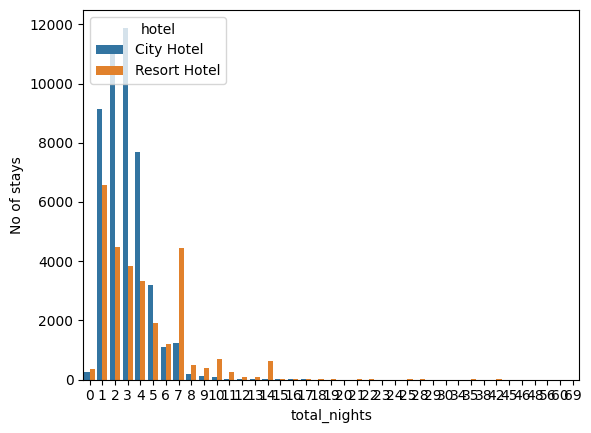

In [ ]:
sns.barplot(x="total_nights", y = "No of stays", hue="hotel",
            hue_order = ["City Hotel","Resort Hotel"], data = stay)

# Correlation

In [ ]:
correlation = new_data.corr()
correlation = correlation["is_canceled"][1:]

<ipython-input-33-bbde65fe4517>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
correlation.abs().sort_values(ascending=False)

lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

# Numerical Features

In [ ]:
new_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,2016.156472,27.163376,15.798717,0.927053,2.499195,1.859206,0.104043,0.007961,0.031499,0.087191,0.137094,0.218799,74.889078,10.735400,2.321215,101.969092,0.062553,0.571504
std,0.483012,106.875450,0.707485,13.601107,8.781070,0.995117,1.897106,0.575186,0.398836,0.097509,0.174663,0.844918,1.498137,0.638504,107.168884,53.830143,17.598002,50.434007,0.245360,0.792876
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.500000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.950000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
new_data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
neg_list = ["days_in_waiting_list", 'arrival_date_year']
num_features = [col for col in new_data.columns if new_data[col].dtype != 'O' and col not in neg_list]

In [ ]:
num_features

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

# Categorical Features

In [ ]:
neg_cat_list = ["country","reservation_status", "booking_changes", "assigned_room_type", "days_in_waiting_list"]

In [ ]:
cat_features = [col for col in new_data.columns
                if new_data[col].dtype == 'O' and col not in neg_cat_list]
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [ ]:
dataset_cat = new_data[cat_features]

In [ ]:
dataset_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,7/2/2015
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,7/2/2015
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,7/3/2015


### Changing to date time dtypes

In [ ]:
change_dtype_list = ["year", "month", "day"]
dataset_cat["reservation_status_date"] = pd.to_datetime(dataset_cat["reservation_status_date"])

dataset_cat["year"] = dataset_cat["reservation_status_date"].dt.year
dataset_cat["month"] = dataset_cat["reservation_status_date"].dt.month
dataset_cat["day"] = dataset_cat["reservation_status_date"].dt.day


<ipython-input-43-8adabd5764e3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-8adabd5764e3>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-8adabd5764e3>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-8adabd5

In [ ]:
dataset_cat.drop("reservation_status_date", axis = 1, inplace = True)

<ipython-input-44-8ec69075ba4e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dataset_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


# Feature Encoding :

In [ ]:
dataset_cat["cancellation"] = new_data["is_canceled"]

<ipython-input-46-62110b358ddc>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dataset_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1,0
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1,0
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2,0
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2,0
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3,0


## Mean encoding:
- groupby and take mean of columns according to target
- map it to original columns
- apply this function to first 9 columns of dataset as it is objects
- remove target after encoding

In [ ]:
def mean_enc(df, col, target):
  mean_encoding = df.groupby([col])[target].mean().to_dict()
  df[col] = df[col].map(mean_encoding)
  return df

for col in dataset_cat.columns[0:8]:
  dataset_cat = mean_enc(dataset_cat, col, "cancellation")
dataset_cat.drop(["cancellation"], axis = 1, inplace = True)

dataset_cat

<ipython-input-48-d0f1627a3a91>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-48-d0f1627a3a91>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-48-d0f1627a3a91>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-48-d0f1627

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...
119385,0.417859,0.377823,0.374106,0.343313,0.410598,0.391567,0.28402,0.407864,2017,9,6
119386,0.417859,0.377823,0.374106,0.367590,0.410598,0.292683,0.28402,0.407864,2017,9,7
119387,0.417859,0.377823,0.374106,0.367590,0.410598,0.318108,0.28402,0.407864,2017,9,7
119388,0.417859,0.377823,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2017,9,7


In [ ]:
num_data = new_data[num_features]
num_data.head()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0.0,0,0
1,0,737,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0.0,0,0
2,0,7,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,75.0,0,0
3,0,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,75.0,0,0
4,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,98.0,0,1


In [ ]:
input_df = pd.concat([num_data, dataset_cat], axis=1)
input_df.head()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,0,342,27,1,0,0,2,0.0,0,0,...,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1
1,0,737,27,1,0,0,2,0.0,0,0,...,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1
2,0,7,27,1,0,1,1,0.0,0,0,...,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2
3,0,13,27,1,0,1,1,0.0,0,0,...,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2
4,0,14,27,1,0,2,2,0.0,0,0,...,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3


# Handling outliers:

In [ ]:
def outlier(col):
  input_df[col] = np.log1p(input_df[col])

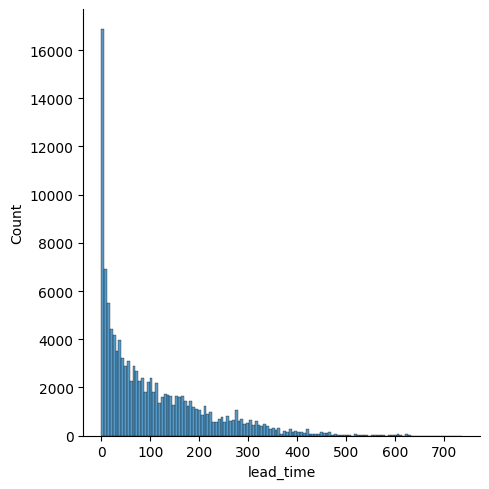

In [ ]:
sns.displot(input_df["lead_time"])

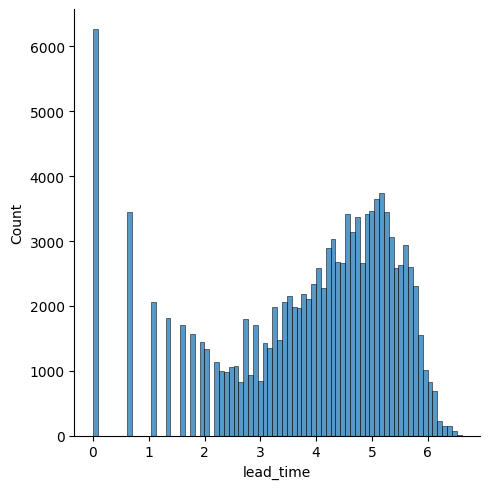

In [ ]:
outlier("lead_time")
sns.displot(input_df["lead_time"])

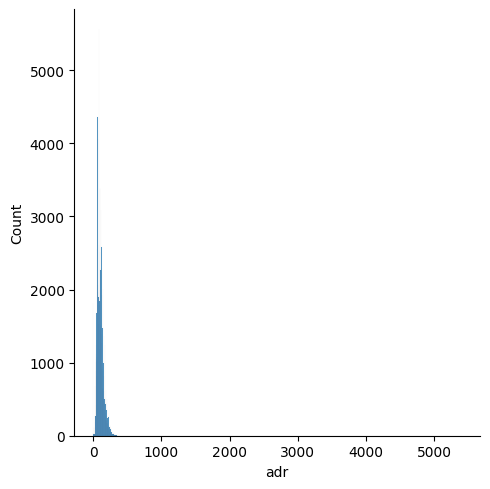

In [ ]:
sns.displot(input_df["adr"])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

invalid value encountered in log1p



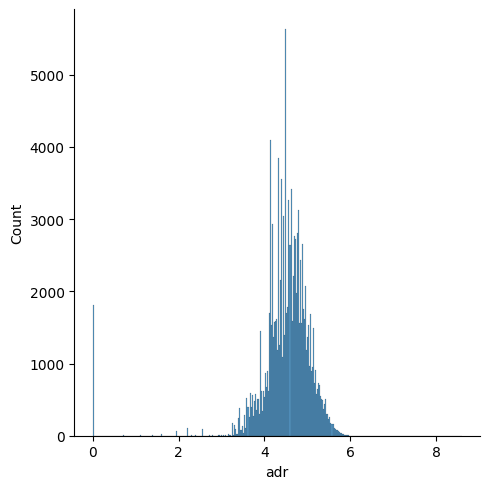

In [ ]:
outlier("adr")
sns.displot(input_df["adr"])

In [ ]:
input_df.isna().sum()

is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
year                              0
month                       

In [ ]:
input_df.dropna(inplace = True)

In [ ]:
input_df.isna().sum()

is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
year                              0
month                       

# Feature selection in data
- using SelectFromModel, we seperate which columns are important and which is not in X
- True - important
- False - not important


In [ ]:
y = input_df["is_canceled"]
X = input_df.drop("is_canceled", axis = 1)


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
model_feature_sel = SelectFromModel(Lasso(alpha=0.005, random_state=0))

In [ ]:
model_feature_sel.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [ ]:
X.columns

Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests',
       'hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
true_features = X.columns[(model_feature_sel.get_support())]

In [ ]:
true_features

Index(['lead_time', 'arrival_date_week_number', 'adults', 'children',
       'previous_cancellations', 'booking_changes', 'company', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'deposit_type', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
X = X[true_features]

In [ ]:
X.columns

Index(['lead_time', 'arrival_date_week_number', 'adults', 'children',
       'previous_cancellations', 'booking_changes', 'company', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'deposit_type', 'year', 'month', 'day'],
      dtype='object')

# Fitting into model and getting predictions:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=4)

### Regressors:
- Logistic Regression
- Lasso
- Ensemble Regressor

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [ ]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
models_reg=[]

models_reg.append(("logistic_model",LogisticRegression()))
models_reg.append(("ensemble_model",GradientBoostingRegressor()))
models_reg.append(("Lasso_model",linear_model.Lasso(alpha=0.1)))

In [ ]:
for name, models in models_reg:
  print(name)
  models.fit(X_train, y_train)
  np.random.seed(42)
  predictions = models.predict(X_test)
  print(confusion_matrix(predictions.round(), y_test))

  print(f"Accuracy:{accuracy_score(predictions.round(), y_test)}")
  print(f"Mean Error: {mean_squared_error(y_test, predictions)}")

  print("\n\n")



logistic_model
[[15112  5168]
 [ 3554  5969]]
Accuracy:0.7073448981646143
Mean Error: 0.2926551018353857



ensemble_model
[[18591  3840     0]
 [   75  7290     0]
 [    0     7     0]]
Accuracy:0.8684025098144482
Mean Error: 0.10221786949500165



Lasso_model
[[18582 10807]
 [   84   330]]
Accuracy:0.6345669899003457
Mean Error: 0.21322123073820357





### Classification:
-

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
models_class = []

models_class.append(("Gaissian classifier", GaussianNB()))
models_class.append(("HistGradientBoosting Classifier", HistGradientBoostingClassifier()))
models_class.append(("KNN", KNeighborsClassifier()))

In [ ]:
for name, model in models_class:
  print(name)
  np.random.seed(42)
  model.fit(X_train, y_train)

  predictions= model.predict(X_test)

  print(confusion_matrix(predictions, y_test))
  print(f"Accuracy:{accuracy_score(predictions, y_test)}")
  print(f"Mean Error: {mean_squared_error(y_test, predictions)}")

  print("\n\n")

Gaissian classifier
[[ 8198  1206]
 [10468  9931]]
Accuracy:0.6082944669999665
Mean Error: 0.3917055330000336



HistGradientBoosting Classifier
[[18631  1120]
 [   35 10017]]
Accuracy:0.9612455121967587
Mean Error: 0.03875448780324128



KNN
[[18528  1438]
 [  138  9699]]
Accuracy:0.9471194175083045
Mean Error: 0.052880582491695464



